In [1]:
import tempfile
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

path = r"..\\Datasets\\Train_crop\\453.jpg"

# path to input image is specified and 
# image is loaded with imread command

img = cv2.imread(path)

# from skimage import io
# img = io.imread(path)

# cv2.cvtColor is applied over the
# image input with applied parameters
# to convert the image in grayscale
img = img[:,:,::-1]
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2.imshow('image', img)
# cv2.waitKey(0)



In [2]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(146, 290)


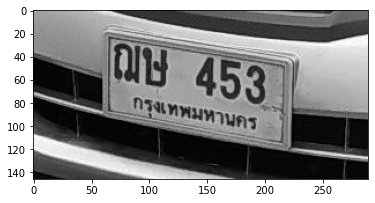

In [3]:
plt.imshow(img, cmap='gray')
plt.show()

# Copy code from 
https://github.com/theAIGuysCode/yolov4-custom-functions

..\Datasets\yolov5_detect\\2878_not_resize.jpg
2878


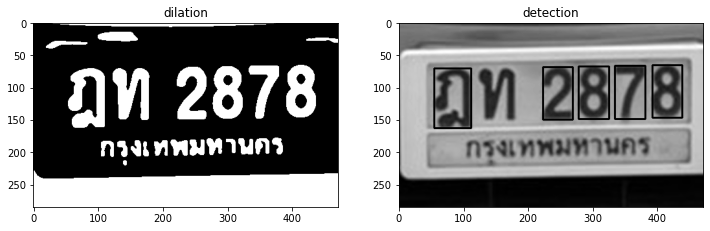

In [22]:
import pytesseract
import cv2
import os
import numpy as np

path = r"..\Datasets\Tutorial\LP.jpg"
# doesn't work
path = r"..\Datasets\Train_crop\453.jpg"
# OK
path = r"..\Datasets\Train_crop\\4-884.jpg"
# doesn't work
path = r"..\Datasets\Train_crop\\6848.jpg"
# work
# path = r"..\Datasets\Train_crop\\1762.jpg"


path = r"..\Datasets\yolov5_detect\\2878_not_resize.jpg"
# path = r"..\Datasets\yolov5_detect\\2878_resize.jpg"


print(path)

# If you don't have tesseract executable in your PATH, include the following:
# pytesseract.pytesseract.tesseract_cmd = r'<full_path_to_your_tesseract_executable>'
# Example tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract'

# point to license plate image (works well with custom crop function)
gray = cv2.imread(path, 0)
gray = cv2.resize(gray, None, fx = 3, fy = 3, interpolation = cv2.INTER_CUBIC)
blur = cv2.GaussianBlur(gray, (5,5), 0)
gray = cv2.medianBlur(gray, 3)
# perform otsu thresh (using binary inverse since opencv contours work better with white text)
ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
# cv2.imshow("Otsu", thresh)
# cv2.waitKey(0)
rect_kern = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

# apply dilation 
dilation = cv2.dilate(thresh, rect_kern, iterations = 1)
#cv2.imshow("dilation", dilation)
#cv2.waitKey(0)
# find contours
try:
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
except:
    ret_img, contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
sorted_contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

# create copy of image
im2 = gray.copy()

plate_num = ""
# loop through contours and find letters in license plate
for cnt in sorted_contours:
    x,y,w,h = cv2.boundingRect(cnt)
    height, width = im2.shape
    
    # if height of box is not a quarter of total height then skip
    if height / float(h) > 6: continue
    ratio = h / float(w)
    # if height to width ratio is less than 1.5 skip
    if ratio < 1.5: continue
    area = h * w
    # if width is not more than 25 pixels skip
    if width / float(w) > 150: continue
    # if area is less than 100 pixels skip
    if area < 100: continue
    # draw the rectangle
    rect = cv2.rectangle(im2, (x,y), (x+w, y+h), (0,255,0),2)
    roi = thresh[y-5:y+h+5, x-5:x+w+5]
    roi = cv2.bitwise_not(roi)
    roi = cv2.medianBlur(roi, 5)
    #cv2.imshow("ROI", roi)
    #cv2.waitKey(0)
    # custom_config = '-c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ --psm 8 --oem 3'
    # custom_config = '-c tessedit_char_whitelist=0123456789 --psm 1'
    # custom_config = r'-l tha+eng --psm 8'
    # custom_config = 'digits'
    custom_config = f'--psm 8 --oem 3 -c tessedit_char_whitelist=123456789'
    text = pytesseract.image_to_string(roi, config=custom_config)
    # print("in loop", text)
    plate_num += text

# new = plate_num.strip()
new = ''
for x in plate_num:
    a = ((x.replace("\n", "")).replace("\x0c", ""))
    if a != '':
        new += a

print((new))

# cv2.imshow("Character's Segmented", im2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

fig, axs = plt.subplots(1, 2, figsize=(12, 30))
axs[0].imshow(dilation, cmap='gray')
axs[0].set_title("dilation")
axs[1].imshow(im2, cmap='gray')
axs[1].set_title("detection")
plt.show()

# Without segmentation

In [5]:
import pytesseract
import cv2
import os
import numpy as np

path = r"..\Datasets\Tutorial\LP.jpg"
path = r"..\Datasets\Train_crop\\4-884.jpg"

# If you don't have tesseract executable in your PATH, include the following:
# pytesseract.pytesseract.tesseract_cmd = r'<full_path_to_your_tesseract_executable>'
# Example tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract'

# point to license plate image (works well with custom crop function)
gray = cv2.imread(path, 0)
gray = cv2.resize( gray, None, fx = 3, fy = 3, interpolation = cv2.INTER_CUBIC)
blur = cv2.GaussianBlur(gray, (5,5), 0)
gray = cv2.medianBlur(gray, 3)
# perform otsu thresh (using binary inverse since opencv contours work better with white text)
ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
# cv2.imshow("Otsu", thresh)
# cv2.waitKey(0)

rect_kern = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

# apply dilation 
dilation = cv2.dilate(thresh, rect_kern, iterations = 1)
# cv2.imshow("Otsu", thresh)
# cv2.imshow("dilation", dilation)
# cv2.waitKey(0)

custom_config = '-c tessedit_char_whitelist=0123456789 --psm 7 --oem 2'
custom_config = f'--psm 7 --oem 3 -c tessedit_char_whitelist=0123456789'
print(pytesseract.image_to_string(thresh, config=custom_config))


4

